<a href="https://colab.research.google.com/github/sajid-ajaz/Object_Detection/blob/main/Sporty_Guru_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's build our first model, a very simple neural network.

In [1]:
#First we have to import necessary library.
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from sklearn.model_selection import train_test_split
import itertools
%matplotlib inline

In [2]:
#download the data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
# normalize the data
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
#change label data to catogirical data.
y_train = to_categorical(y_train, num_classes = 10)
y_test=to_categorical(y_test,num_classes=10)

In [5]:
random_seed=(2)

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, 
                                                  random_state=random_seed)

In [7]:
#Our first model without any hidden layer. 
NetA = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(32,32,3)),
            tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])
NetA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [8]:
epochs = 50
batch_size = 20

In [9]:
#compiling the model. 
NetA.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [10]:
#Traing the model.
history=NetA.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, 
                  validation_data=(x_val,y_val),verbose=1)

Epoch 1/50
2000/2000 [==============================] - 7s 2ms/step - loss: 2.0278 - accuracy: 0.3037 - val_loss: 1.9702 - val_accuracy: 0.3352
Epoch 2/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.9239 - accuracy: 0.3445 - val_loss: 2.1118 - val_accuracy: 0.3247
Epoch 3/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8961 - accuracy: 0.3527 - val_loss: 1.8731 - val_accuracy: 0.3625
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8871 - accuracy: 0.3581 - val_loss: 1.8676 - val_accuracy: 0.3693
Epoch 5/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8822 - accuracy: 0.3635 - val_loss: 1.8762 - val_accuracy: 0.3688
Epoch 6/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8722 - accuracy: 0.3688 - val_loss: 2.1284 - val_accuracy: 0.3231
Epoch 7/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8622 - accuracy: 0.3726 - val_loss: 1.8548 - val_accuracy:

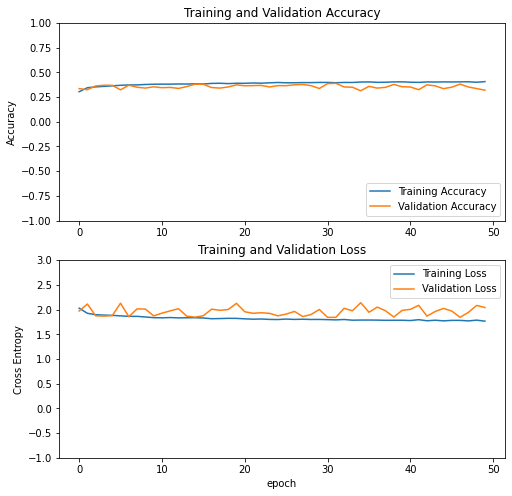

In [11]:
# Plot the loss and accuracy curves for training and validation 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Let's build our second model.

In [12]:
#Our second model without any hidden layer. 
NetB = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(32,32,3)), #Flatening the image
            tf.keras.layers.Dense(300,activation='relu'),# Dense layer with 300 neurons and relu activation.
            tf.keras.layers.Dense(10,activation=tf.nn.softmax)#Final layer with 10 output.
    ])
NetB.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________


In [13]:
#compiling the model. 
NetB.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
#Training the model.
history=NetB.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, 
                  validation_data=(x_val,y_val),verbose=1)

Epoch 1/50
2000/2000 [==============================] - 5s 3ms/step - loss: 1.8954 - accuracy: 0.3200 - val_loss: 1.7493 - val_accuracy: 0.3814
Epoch 2/50
2000/2000 [==============================] - 5s 2ms/step - loss: 1.7378 - accuracy: 0.3778 - val_loss: 1.6654 - val_accuracy: 0.4113
Epoch 3/50
2000/2000 [==============================] - 5s 2ms/step - loss: 1.6728 - accuracy: 0.4042 - val_loss: 1.6671 - val_accuracy: 0.4046
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6381 - accuracy: 0.4164 - val_loss: 1.6777 - val_accuracy: 0.4049
Epoch 5/50
2000/2000 [==============================] - 5s 2ms/step - loss: 1.6122 - accuracy: 0.4236 - val_loss: 1.6856 - val_accuracy: 0.3961
Epoch 6/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.5980 - accuracy: 0.4279 - val_loss: 1.6349 - val_accuracy: 0.4230
Epoch 7/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.5753 - accuracy: 0.4348 - val_loss: 1.5888 - val_accuracy:

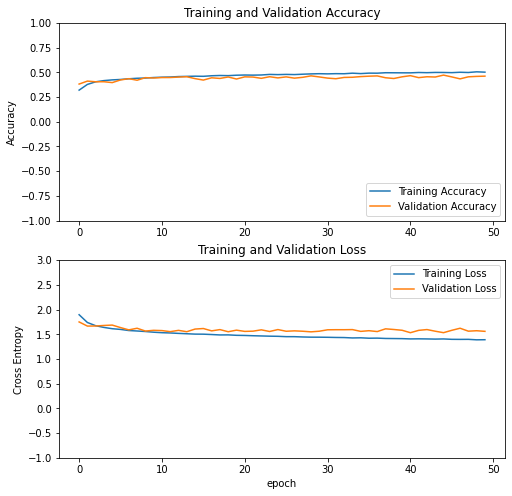

In [15]:
# Plot the loss and accuracy curves for training and validation 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
# Third model with convolution layer.
NetC = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(25,(3,3),activation='relu',input_shape=(32,32,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])
NetC.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 25)        700       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 25)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5625)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                56260     
Total params: 56,960
Trainable params: 56,960
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compiling the model. 
NetC.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
#Traing the model.
history=NetC.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, 
                  validation_data=(x_val,y_val),verbose=1)

Epoch 1/50
2000/2000 [==============================] - 33s 3ms/step - loss: 1.4886 - accuracy: 0.4789 - val_loss: 1.3100 - val_accuracy: 0.5439
Epoch 2/50
2000/2000 [==============================] - 5s 3ms/step - loss: 1.2286 - accuracy: 0.5711 - val_loss: 1.2287 - val_accuracy: 0.5741
Epoch 3/50
2000/2000 [==============================] - 6s 3ms/step - loss: 1.1340 - accuracy: 0.6058 - val_loss: 1.1972 - val_accuracy: 0.5839
Epoch 4/50
2000/2000 [==============================] - 5s 3ms/step - loss: 1.0627 - accuracy: 0.6337 - val_loss: 1.1858 - val_accuracy: 0.5963
Epoch 5/50
2000/2000 [==============================] - 6s 3ms/step - loss: 1.0119 - accuracy: 0.6496 - val_loss: 1.1278 - val_accuracy: 0.6132
Epoch 6/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.9665 - accuracy: 0.6673 - val_loss: 1.1255 - val_accuracy: 0.6109
Epoch 7/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.9366 - accuracy: 0.6766 - val_loss: 1.1350 - val_accuracy

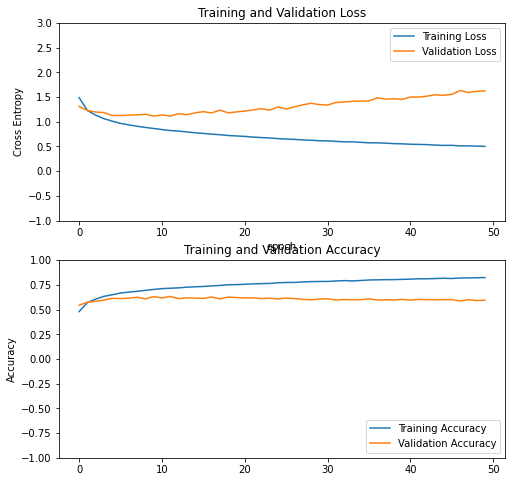

In [19]:
# Plot the loss and accuracy curves for training and validation 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()